In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import subprocess
import os.path
import math

In [2]:
#parameters
NN = [10, 100, 1000]
hbar = 1
omega = 1
L = 10
eigenvalues = []
eigenvalues_theoreticals = []
eigenvectors = []
for N in NN:
    dx = 2*L/(N-1)
    ofile = open("L.txt", "w+")
    ofile.write(str(L))
    ofile.close()

    ofile = open("mesh.txt", "w+")
    ofile.write(str(N))
    ofile.close()
    result = subprocess.run(['./p6'], stdout=subprocess.PIPE)
    
    eigenvalues.append(np.loadtxt('eigenvalues.txt'))
    eigenvalues_theoreticals.append(np.loadtxt('energy.txt'))
    eigenvectors.append(np.loadtxt('evect_exp.txt'))
    

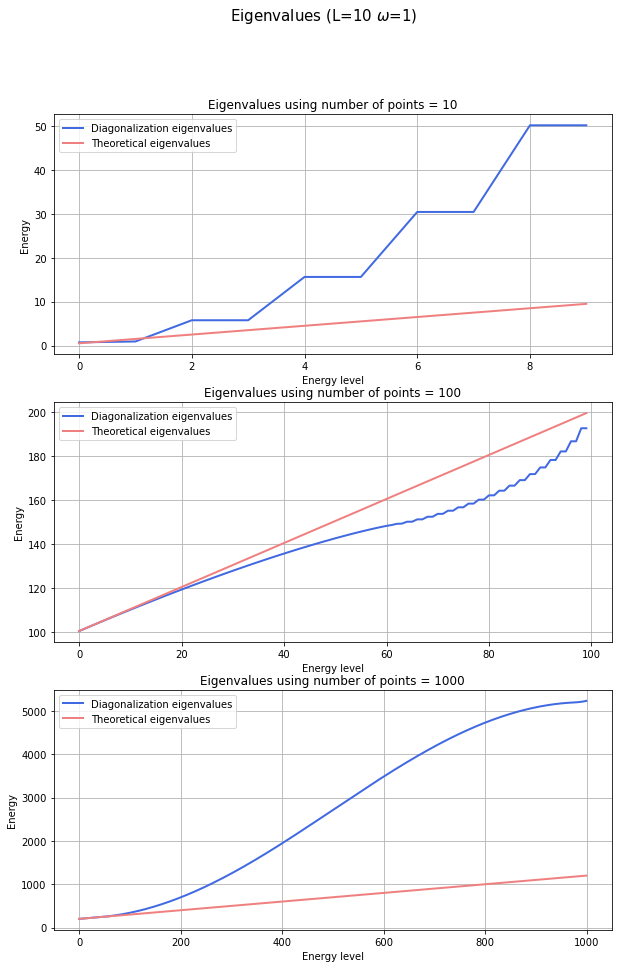

In [3]:
fig,axs = plt.subplots(ncols=1, nrows=len(NN), figsize=(10,15))
for i in range(len(NN)):
    axs[i].plot(np.arange(NN[i]),eigenvalues[i] +100*i, label='Diagonalization eigenvalues', lw=2, c = 'royalblue')
    axs[i].plot(np.arange(NN[i]), eigenvalues_theoreticals[i] + 100*i, label='Theoretical eigenvalues', lw=2, c = 'lightcoral')
   # axs[i].set_xlim(-5,5)
    axs[i].legend()
    axs[i].set_title('Eigenvalues using number of points = '+ str(NN[i]))
    axs[i].set_xlabel('Energy level')
    axs[i].set_ylabel('Energy')
    axs[i].grid()
fig.suptitle('Eigenvalues (L='+str(L)+" $\omega$=" + str(omega)+')', fontsize=15)
plt.savefig('energy.png')
plt.show()

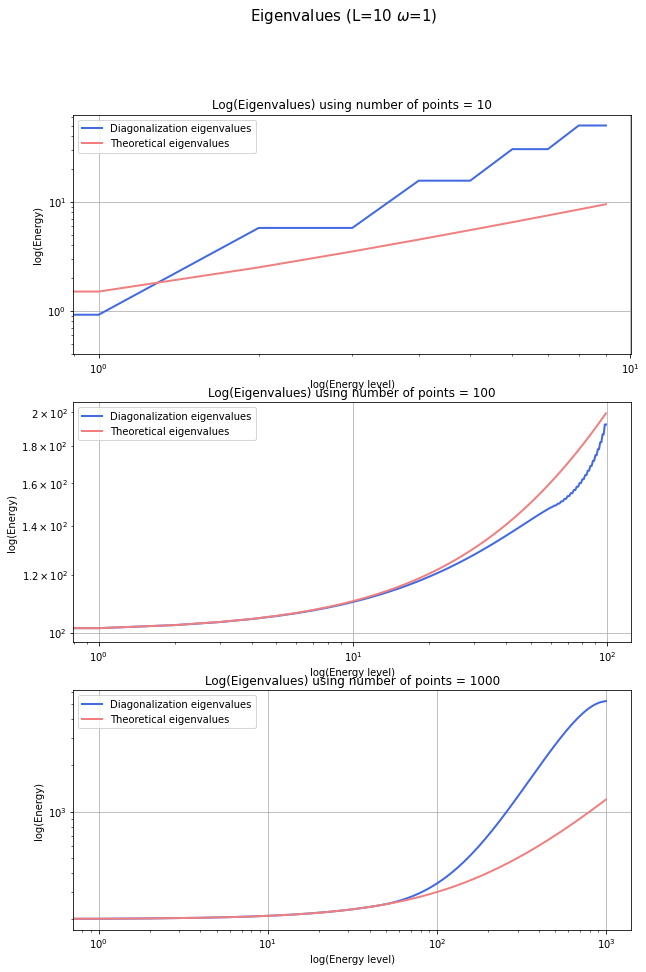

In [10]:
fig,axs = plt.subplots(ncols=1, nrows=len(NN), figsize=(10,15))
for i in range(len(NN)):
    axs[i].plot(np.arange(NN[i]),eigenvalues[i] +100*i, label='Diagonalization eigenvalues', lw=2, c = 'royalblue')
    axs[i].plot(np.arange(NN[i]), eigenvalues_theoreticals[i] + 100*i, label='Theoretical eigenvalues', lw=2, c = 'lightcoral')
   # axs[i].set_xlim(-5,5)
    axs[i].legend()
    axs[i].set_title('Log(Eigenvalues) using number of points = '+ str(NN[i]))
    axs[i].set_xlabel('log(Energy level)')
    axs[i].set_ylabel('log(Energy)')
    axs[i].grid()
    axs[i].set_yscale("log")
    axs[i].set_xscale("log")
fig.suptitle('Eigenvalues (L='+str(L)+" $\omega$=" + str(omega)+')', fontsize=15)
plt.savefig('log(energy).png')
plt.show()




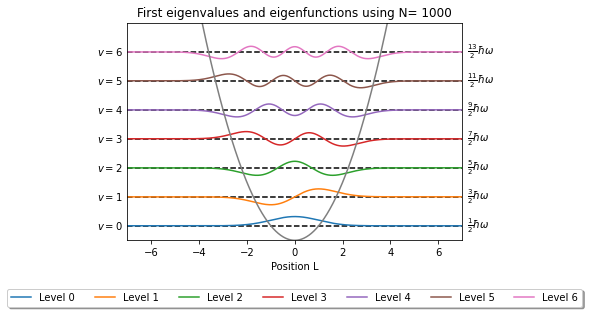

In [4]:
#Plot of th eigenfuction with L = 1000
# Maximum vibrational quantum number to calculate wavefunction for
v_max = 7
m = 1
x=np.linspace(-L, L, NN[2])
for i in range(v_max):
    plt.axhline(eigenvalues[2][i], c='black', ls='--')
    plt.plot(x, eigenvalues[2][i]+3*eigenvectors[2][i*NN[2]:(i+1)*NN[2]], label='Level '+str(i))
    plt.text(s=r'$v={}$'.format(i), x=-7.2, y=eigenvalues[2][i], va='center', ha='right')
    plt.text(s=r'$\frac{{{}}}{{2}}\hbar\omega$'.format(2*i+1), x=7+0.2,
            y=eigenvalues[2][i], va='center')
plt.plot(x, 0.5*omega*omega*m*(x**2))
plt.ylim(0, eigenvalues[2][v_max])
plt.xlim(-7, 7)
plt.xlabel('Position L' )
plt.yticks([])
plt.title('First eigenvalues and eigenfunctions using N= '+ str(NN[2]))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=v_max)
plt.savefig('potential.png')
plt.show()

# theoretical 

In [5]:
def make_Hr():
    """Hermite polynomials."""
    # H_[v] = 2qH_[v-1] - 2(v-1)H_[v-2]
    Hr = [None] * (v_max + 1)
    Hr[0] = np.poly1d([1.,])
    Hr[1] = np.poly1d([2., 0.])
    for v in range(2, v_max+1):
        Hr[v] = Hr[1]*Hr[v-1] - 2*(v-1)*Hr[v-2]
    return Hr

Hr = make_Hr()


# Normalization constant and energy for vibrational state v
Norm = lambda v: 1./np.sqrt(np.sqrt(np.pi)*2**v*math.factorial(v))

def get_psi(v, q):
    """ harmonic oscillator wavefunction for level v on grid q."""
    return Norm(v)*Hr[v](q)*np.exp(-q*q/2.)

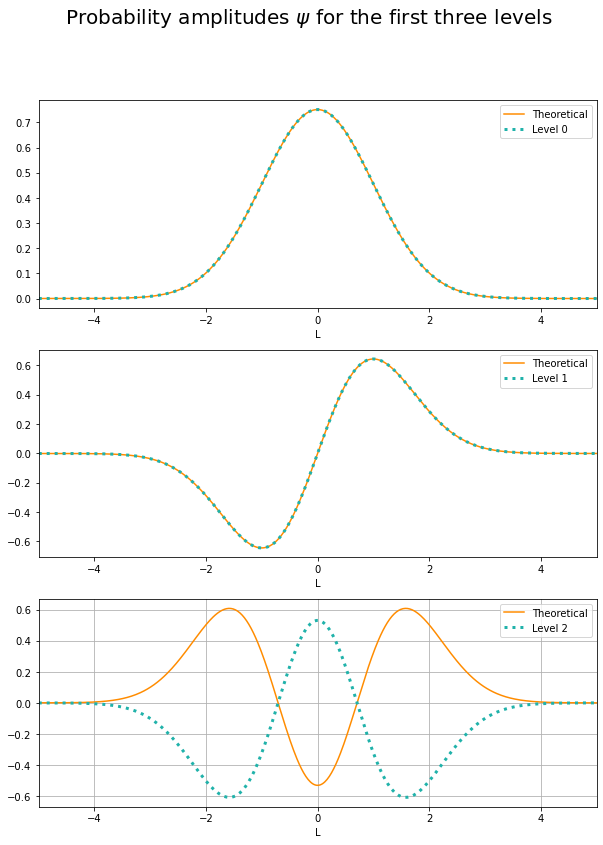

In [6]:
v_max=3
fig,axs = plt.subplots(ncols=1, nrows=v_max, figsize=(10,13))
for i in range(v_max):
    psi2 = eigenvectors[2][i*N:(i+1)*N]/np.sqrt(dx)
    x=np.linspace(-10, 10, 1000)
    psi_v = get_psi(i, x)
    axs[i].plot(x, psi_v, label = 'Theoretical', color = 'darkorange')
    axs[i].plot(x,psi2 , label='Level '+str(i), lw=3, c='lightseagreen', ls=':')
    axs[i].set_xlim(-5,5)
    axs[i].legend()
    axs[i].set_xlabel('L')
fig.suptitle('Probability amplitudes $\psi$ for the first three levels', fontsize=20)
plt.savefig('psi.png')
plt.grid()
plt.show()

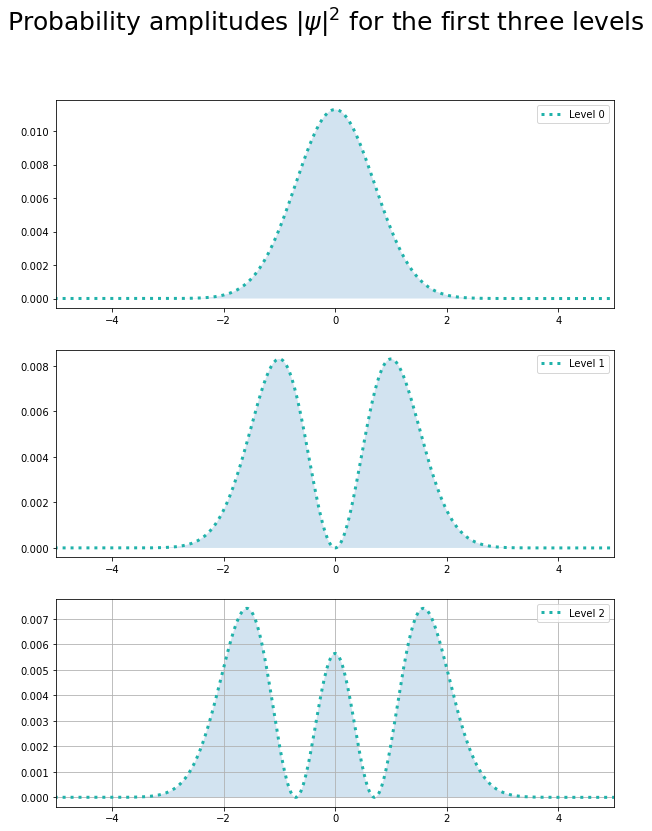

In [7]:
v_max=3
fig,axs = plt.subplots(ncols=1, nrows=v_max, figsize=(10,13))
for i in range(v_max):
    psi2 = eigenvectors[2][i*N:(i+1)*N]**2
    axs[i].plot(x,psi2 , label='Level '+str(i), lw=3, c='lightseagreen', ls=':')
    axs[i].fill_between(x,psi2,  alpha=0.2 )
    axs[i].set_xlim(-5,5)
    axs[i].legend()
fig.suptitle('Probability amplitudes $|\psi|^2$ for the first three levels', fontsize=25)
plt.savefig('pramp.png')
plt.grid()
plt.show()

Realtion of Computational time with N

In [4]:
#parameters
import time
cpu_times = []
for N in range(10, 1000, 10):
    dx = 2*L/(N-1)
    ofile = open("L.txt", "w+")
    ofile.write(str(L))
    ofile.close()

    ofile = open("mesh.txt", "w+")
    ofile.write(str(N))
    ofile.close()
    
    start = time.time()
    result = subprocess.run(['./p6'], stdout=subprocess.PIPE)
    time_elapsed = (time.time() - start) 
    cpu_times.append(time_elapsed)
    

In [36]:
N = np.arange(10, 1000, 10)


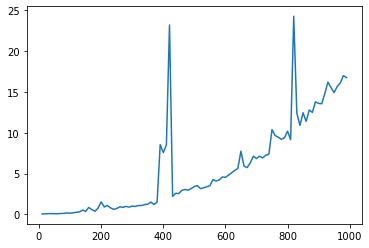

In [37]:
plt.plot(N, cpu_times)

In [38]:
np.savetxt('cpu_times.txt', list(zip(N, cpu_times)))